In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

 - http://www.users.on.net/~zygmunt.szpak/ellipsefitting.html
 - https://www.researchgate.net/publication/3659879_Direct_Least-squares_fitting_of_ellipses/link/00463531e42a2a932f000000/download
 - https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html#scipy.optimize.least_squares
 - https://en.wikipedia.org/wiki/Rayleigh_quotient

In [2]:
def scale(a=2, b=1):
    return np.array([[a, 0], [0, b]])

In [3]:
def rotation(alpha=np.pi/4):
    return np.array([
        [np.cos(alpha), -np.sin(alpha)],
        [np.sin(alpha),  np.cos(alpha)]
    ])

In [4]:
def circle(phi, rho=1):
    return rho*np.array([np.cos(phi), np.sin(phi)])

In [5]:
def ellipse(phi, rho, alpha, S, Xc):
    C = circle(phi, rho=rho)
    R = rotation(alpha)
    S = scale(*S)
    Xc = np.array(Xc)
    return np.dot(R, np.dot(S, C)).T + Xc

In [6]:
t = np.linspace(np.pi/2, 3/2*np.pi, 200)
t2 = np.linspace(0, 2*np.pi, 200)
e = np.random.randn(t.size)*1e-1

In [7]:
X = ellipse(phi=t, rho=2+e, alpha=np.pi/4, S=[2, 1], Xc=[1, 1])
Xr = ellipse(phi=t2, rho=2, alpha=np.pi/4, S=[2, 1], Xc=[1, 1])

In [8]:
X.shape

(200, 2)

In [9]:
def f(x, a, b, c, d, e):
    return a*x[:,0]**2 + b*x[:,0]*x[:,1] + c*x[:,1]**2 + d*x[:,0] + e*x[:,1]

In [10]:
def f2(x, x0, x1, k0, k1):
    return k0*(x[:,0] - x0)**2 + k1*(x[:,1] - x1)**2

In [44]:
optsol, optcov = optimize.curve_fit(f, X, np.ones_like(X[:,0]))

In [45]:
optsol

array([ 0.17128143, -0.22132729,  0.17753398, -0.16053247, -0.14571045])

In [48]:
def coef(A,B,C,D,E,F):
    return [
        -np.sqrt(2*(A*E**2 + C*D**2 - B*D*E + (B**2-4*A*C)*F)*((A+C)+np.sqrt((A-C)**2+B**2)))/(B**2-4*A*C),
        -np.sqrt(2*(A*E**2 + C*D**2 - B*D*E + (B**2-4*A*C)*F)*((A+C)-np.sqrt((A-C)**2+B**2)))/(B**2-4*A*C),
        (2*C*D-B*E)/(B**2-4*A*C),
        (2*A*E-B*D)/(B**2-4*A*C),
        np.arctan((C-A-np.sqrt((A-C)**2+B**2))/B)
    ]

In [49]:
r = np.array(coef(*(list(optsol)+[-1])))
r

array([4.31182719, 2.03807586, 1.22853292, 1.17616443, 0.77127679])

\begin{align}
  a, b    &= \frac{-\sqrt{2 \Big(A E^2 + C D^2 - B D E + (B^2 - 4 A C) F\Big)\left((A + C) \pm \sqrt{(A - C)^2 + B^2}\right)}}{B^2 - 4 A C} \\
  x_\circ  &= \frac{2CD - BE}{B^2 - 4AC} \\[3pt]
  y_\circ  &= \frac{2AE - BD}{B^2 - 4AC} \\[3pt]
    \Theta &= \begin{cases}
                \arctan\left(\frac{1}{B}\left(C - A - \sqrt{(A - C)^2 + B^2}\right)\right)
                         & \text{for } B \ne 0 \\
                       0 & \text{for } B = 0,\ A < C \\
                90^\circ & \text{for } B = 0,\ A > C \\
              \end{cases}
\end{align}

In [15]:
Xhat = ellipse(phi=t2, rho=1, alpha=np.pi/4, S=r[:2], Xc=r[2:])

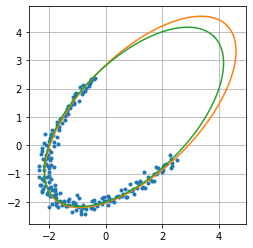

In [16]:
fig, axe = plt.subplots()
axe.plot(X[:,0], X[:,1], '.')
axe.plot(Xhat[:,0], Xhat[:,1])
axe.plot(Xr[:,0], Xr[:,1])
axe.set_aspect('equal', adjustable='box')
axe.grid()

In [17]:
np.sqrt(np.sum((f(X, *optsol) - 1)**2))

1.4995239140790844

In [18]:
optsol, optcov = optimize.curve_fit(f2, X, np.ones_like(X[:,0]))

In [19]:
optsol

array([-0.11844241, -0.14271934,  0.21098849,  0.21517388])

In [20]:
Xb = np.array([X[:,0]**2, X[:,0]*X[:,1], X[:,1]**2, X[:,0], X[:,1], np.ones_like(X[:,0])]).T

In [21]:
M = np.dot(Xb.T, Xb)

In [22]:
M

array([[1715.92227658,  366.79410363,  739.2255025 , -500.5160339 ,
        -364.28020432,  477.3902318 ],
       [ 366.79410363,  739.2255025 ,  381.060466  , -364.28020432,
        -354.65831468,   77.02164608],
       [ 739.2255025 ,  381.060466  , 1712.52912346, -354.65831468,
        -517.8231142 ,  478.69505087],
       [-500.5160339 , -364.28020432, -354.65831468,  477.3902318 ,
          77.02164608, -155.92734573],
       [-364.28020432, -354.65831468, -517.8231142 ,   77.02164608,
         478.69505087, -157.94541654],
       [ 477.3902318 ,   77.02164608,  478.69505087, -155.92734573,
        -157.94541654,  200.        ]])

In [23]:
l, U = np.linalg.eigh(M)

In [24]:
l

array([1.94025723e+00, 6.45973285e+01, 3.63875643e+02, 7.18596158e+02,
       1.01187640e+03, 3.16287640e+03])

In [25]:
U

array([[ 0.15813566,  0.18847825,  0.15859473, -0.24683527, -0.69484386,
        -0.60875375],
       [-0.20933872,  0.44123571,  0.02606546,  0.82882056,  0.02096367,
        -0.27097223],
       [ 0.16399277,  0.18724172, -0.17836557, -0.26956216,  0.67843705,
        -0.6109763 ],
       [-0.15336251,  0.5868077 ,  0.67518619, -0.29419025,  0.16239077,
         0.25167759],
       [-0.13946438,  0.58508752, -0.6972682 , -0.23633795, -0.17346137,
         0.25708923],
       [-0.92806595, -0.21921876, -0.01716674, -0.19251375, -0.00401082,
        -0.23079081]])

In [26]:
U[:,0]

array([ 0.15813566, -0.20933872,  0.16399277, -0.15336251, -0.13946438,
       -0.92806595])

In [27]:
r = np.array(coef(*U[:,0]))
r

array([4.45513594, 2.05147504, 1.32692961, 1.27213575])

In [28]:
Xhat = ellipse(phi=t2, rho=1, alpha=np.pi/4, S=r[:2], Xc=r[2:])

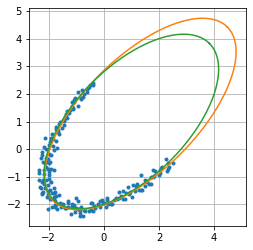

In [29]:
fig, axe = plt.subplots()
axe.plot(X[:,0], X[:,1], '.')
axe.plot(Xhat[:,0], Xhat[:,1])
axe.plot(Xr[:,0], Xr[:,1])
axe.set_aspect('equal', adjustable='box')
axe.grid()

In [40]:
F = np.zeros((6,6))
#F[0,0] = 1
F[0,2] = 2
F[2,0] = 2
F[1,1] = -1

In [41]:
F

array([[ 0.,  0.,  2.,  0.,  0.,  0.],
       [ 0., -1.,  0.,  0.,  0.,  0.],
       [ 2.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

In [37]:
np.linalg.det(F)

0.0

In [39]:
np.linalg.cholesky(F)

LinAlgError: Matrix is not positive definite

In [ ]:
def s(theta, A):
    return np.dot(np.dot(theta.T, np.dot(A, theta)))

In [ ]:
def u(x):
    return np.array([x[:,0]**2, x[:,0]*x[:,1], x[:,1]**2, x[:,0], x[:,1], np.ones_like(x[:,0])])

In [ ]:
def Mx(x):
    return np.dot(u(x).T, u(x))

In [ ]:
def f(theta, X=X, F=F):
    return s(theta, M(X))/s(theta, F)